In [ ]:
##ERG BELANGRIJK!!! EERST DEZE RUNNEN!!!
import os
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/SE4CSAI
print(os.getcwd())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/.shortcut-targets-by-id/1wMl2gu3emaszHlNuBQoaXJSBxeC2MM-f/SE4CSAI
/content/drive/.shortcut-targets-by-id/1wMl2gu3emaszHlNuBQoaXJSBxeC2MM-f/SE4CSAI


In [ ]:
#Importing the modules
import os

import pandas as pd
import numpy as np
import librosa
import librosa.display
import wave
import math, random
from IPython.display import Audio
from scipy.io import wavfile
from matplotlib import pyplot as plt
from google.colab import drive

#!wget https://archive.org/download/warblrb10k_public/warblrb10k_public_wav.zip
#!wget https://surfdrive.surf.nl/files/index.php/s/kQBIBvdqRu1d9Y8/download

Here starts the ETL Pipeline, this is the data extraction part

Making the links to the required datasets:   (we moeten de filenamen nog even  aanpassen)

In [ ]:
# maak eerst een shortcut van gedeelde documenten naar "My Drive", dan werkt dit stukje code pas naar behoren.
# hieronder heb ik de path gezet die het zou moeten zijn dan.

# drive.mount('/content/drive', force_remount= True)

bird_detection_audiopath = "/content/drive/MyDrive/SE4CSAI/bird_audio"
os.chdir(bird_detection_audiopath)
bird_detection_labels = pd.read_csv("/content/drive/MyDrive/SE4CSAI/warblrb10k_public_metadata_2018.csv")

#bird_detection_labels.set_index("itemid", inplace = True)
bird_detection_labels


print("hellow word")


,itemid,datasetid,hasbird
0,759808e5-f824-401e-9058,warblrb10k,1
1,1d94fc4a-1c63-4da0-9cac,warblrb10k,1
2,bb0099ce-3073-4613-8557,warblrb10k,1
3,c4c67e81-9aa8-4af4-8eb7,warblrb10k,1
4,ab322d4b-da69-4b06-a065,warblrb10k,0
...,...,...,...
7995,ca7b3342-17b0-444f-ba2a,warblrb10k,1
7996,43071f95-d31e-447b-8786,warblrb10k,1
7997,0d4d2fea-743d-46aa-a17f,warblrb10k,1
7998,0d34160d-55db-4c70-93fa,warblrb10k,1


In [ ]:
bird_detection_labels = pd.read_csv("/content/drive/MyDrive/SE4CSAI/warblrb10k_public_metadata_2018.csv")

#bird_detection_labels.set_index("itemid", inplace = True)      # here we make a dictionary to get the labels from the list in a computationally faster way.
bird_detection_labels
 
bird_detection_label_dictionary = {}
for x in bird_detection_labels.iterrows():

  bird_detection_label_dictionary[x[1][0]] = x[1][2]
 

print(bird_detection_label_dictionary)

{'759808e5-f824-401e-9058': 1, '1d94fc4a-1c63-4da0-9cac': 1, 'bb0099ce-3073-4613-8557': 1, 'c4c67e81-9aa8-4af4-8eb7': 1, 'ab322d4b-da69-4b06-a065': 0, '519cfbe6-f804-4add-baa3': 0, '6332d960-6f57-4ecc-8d1a': 1, 'db89b696-5ca0-4ca8-982a': 1, 'a02ac7bc-5a29-40a1-89e1': 1, '6ce66c37-3a83-43b1-b0dd': 1, '126160c6-cd85-41f7-a5e7': 1, '19d149c7-98a8-48d2-921d': 1, '4dd5046d-c962-4f02-a820': 1, '479b90e3-85bf-403c-8298': 0, '3661273c-19b9-4ea0-abc5': 1, '5e8976e1-c7bf-45b7-b22b': 1, '947e8e78-3f1d-4493-936f': 1, 'b7a49bf2-f898-41ec-be40': 0, 'd09bf6fc-6275-47b2-9a3e': 1, '960784f4-34aa-4235-9d9c': 1, '4c6d2568-17f6-4ca7-b347': 0, '1e1ade85-72d2-4c85-b428': 1, 'efe349dd-319a-42bf-ae04': 1, 'e30d7c93-f1bc-4ca5-af31': 1, '13562d9b-aa0b-42ca-9198': 1, 'f08f8ca2-59dd-4065-9abb': 1, 'b2952a5b-6e87-4b3d-b7a8': 1, '98fe674f-985a-4434-aa82': 1, '56239bc2-5af8-4586-b2c7': 1, 'bfee5f94-ed1d-48da-9681': 1, '0a0b783d-f9a3-4652-a01d': 0, '031f0a9b-446c-496f-8997': 1, '1e860c93-dd38-4711-88de': 1, '026eceb5

In [ ]:
bird_species_labels = pd.read_csv("/content/drive/MyDrive/SE4CSAI/bird_species/ukxcmany/xcmeta.csv", on_bad_lines='skip', sep = "\t")

#bird_detection_labels.set_index("itemid", inplace = True) # we doen en
bird_species_labels

bird_species_label_dictionary = {}
for x in bird_species_labels.iterrows():
 
  bird_species_label_dictionary[str(x[1][0])] = x[1][3]     #we place the file name with the species name into a dictionary
 

print(bird_species_label_dictionary)

{'132608': 'Common Redpoll', '132609': 'Common Redpoll', '132611': 'Common Redpoll', '26308': 'Common Redpoll', '168551': 'Common Redpoll', '90382': 'Common Redpoll', '100976': 'Common Redpoll', '26244': 'Common Redpoll', '35068': 'Common Redpoll', '152480': 'Common Redpoll', '83811': 'Eurasian Sparrowhawk', '83812': 'Eurasian Sparrowhawk', '143334': 'Eurasian Sparrowhawk', '143335': 'Eurasian Sparrowhawk', '27400': 'Eurasian Sparrowhawk', '83816': 'Eurasian Sparrowhawk', '107283': 'Eurasian Sparrowhawk', '37237': 'Eurasian Sparrowhawk', '95574': 'Eurasian Sparrowhawk', '25941': 'Eurasian Sparrowhawk', '50432': 'Great Reed Warbler', '180810': 'Great Reed Warbler', '83213': 'Great Reed Warbler', '50482': 'Great Reed Warbler', '50483': 'Great Reed Warbler', '50484': 'Great Reed Warbler', '53686': 'Great Reed Warbler', '181300': 'Great Reed Warbler', '48347': 'Great Reed Warbler', '178876': 'Great Reed Warbler', '31625': "Blyth's Reed Warbler", '180043': "Blyth's Reed Warbler", '100332': 

In [ ]:
bird_species_label_dictionary.get("132608")

'Common Redpoll'

[   3    3   -1 ... 2258 2027 1886]
[[ 3.33171338e-04+0.0000000e+00j  1.26650048e-04+0.0000000e+00j
  -4.60730458e-04+0.0000000e+00j ...  4.69848979e-04+0.0000000e+00j
  -1.16749763e+00+0.0000000e+00j -2.33367944e+00+0.0000000e+00j]
 [-3.44098982e-04-1.9322939e-20j -3.25610636e-05-1.8885957e-04j
   1.71155159e-04-3.8709975e-04j ...  2.96688522e-03+5.4101681e-04j
  -4.53054579e-03-1.1720220e+00j  2.34400225e+00+7.2230380e-03j]
 [ 3.64327512e-04+9.4039732e-21j -2.09743986e-04-7.2673465e-05j
   1.61435775e-04+3.1711644e-04j ... -9.03851539e-03+2.5399737e-03j
   1.19066525e+00-2.9428962e-03j -2.36342835e+00-1.4529988e-02j]
 ...
 [-4.36933551e-05+5.5394050e-20j  2.18476889e-05-8.6160430e-09j
   5.85987092e-10+1.0177825e-09j ...  1.78887163e-07+2.2398459e-07j
  -6.67456537e-03+4.2091582e-05j  1.33081032e-02-8.1653598e-05j]
 [ 4.36801893e-05+2.1864038e-20j -2.82216517e-09-2.1838548e-05j
   2.13664975e-09+7.0526716e-11j ...  6.77648444e-08-3.1157919e-07j
  -2.16646640e-05-6.6757919e-03j -1.331

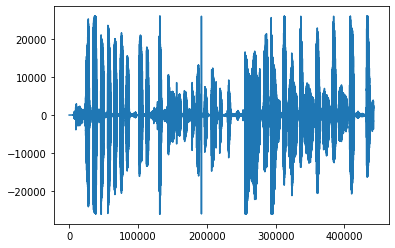

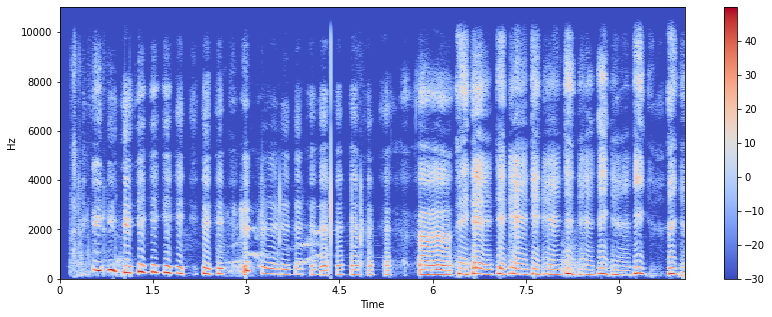

In [ ]:
# even ter illustratie dat de code daadwerkelijk gelezen wordt, hiernaa heb ik een loop gemaakt zodat 
# alle files gelezen worden. het is dan aan ons om daar now wat verder mee te doen.

u, wav = wavfile.read('/content/drive/MyDrive/SE4CSAI/bird_audio/0a0b783d-f9a3-4652-a01d.wav')

print(wav)
x, sr = librosa.load('/content/drive/MyDrive/SE4CSAI/bird_audio/0a0b783d-f9a3-4652-a01d.wav')

plt.plot(wav)

X = librosa.stft(x)
print(X)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

# we moeten ff kijken hoe we dit in de dataset of neural net willen gooien (nog best belangrijk) 
#Ik krijg namelijk alleen imaginary numbers gestores in een matric, maar idk of dat goed is, het duurt ook best lang om dat allemaal te storen

Combining audio data with label data of bird detection.:

zet de bird detection audio in een dataset en de bird species audio
:

In [ ]:
#hier dus de loop; Duurde 11 minuten voor mij.
bird_classification_dataset = pd.DataFrame(columns = ["Filename", "Data", "IsBird"]) #empty database

bird_species_dataset = pd.DataFrame(columns = ["Filename", "Data", "gen"]) #empty database

class_counter = 0
species_counter = 0
for file in os.listdir(bird_detection_audiopath):       #this part of the loop stores the classification audio and labels from the datasets into one.
 
  audiofile = "/content/drive/MyDrive/SE4CSAI/bird_audio/" + file
  x, sr = librosa.load(audiofile) # we use libriosa.load to also immediately normailze the data.

  bird_classification_dataset.loc[class_counter, ['Filename']] = file 

  X = librosa.stft(x)
  Xdb = librosa.amplitude_to_db(abs(X))
  bird_classification_dataset.loc[class_counter, ['Data']] = [Xdb]

  bird_classification_dataset.loc[class_counter, ['IsBird']] = bird_detection_label_dictionary.get(file[:-4])
  class_counter += 1








 



KeyboardInterrupt: ignored

In [ ]:
bird_species_audiopath = "/content/drive/MyDrive/SE4CSAI/bird_species/ukxcmany/flac/"
os.chdir(bird_species_audiopath)
for file in os.listdir(bird_species_audiopath):   
  audiofile = "/content/drive/MyDrive/SE4CSAI/bird_species/ukxcmany/flac/" + file
  x, sr = librosa.load(audiofile)
  bird_audio_dataset.loc[class_counter, ['Filename']] = file
  X = librosa.stft(x)

  Xdb = librosa.amplitude_to_db(abs(X))
  bird_classification_dataset.loc[class_counter, ['Data']] = [Xdb]     #this part of the loop stores all the bird species also in the classification to increase the dataset size
  
  bird_audio_dataset.loc[class_counter, ['IsBird']] = 1
  class_counter += 1

  bird_species_dataset.loc[species_counter, ['Filename']] = file[2:-5]
  bird_species_dataset.loc[species_counter, ['Data']] = [x]       #this part of the loop stores the ausiodata of bird species in a seperate dataset, it also gets the species\gen etc as a label.
  bird_species_dataset.loc[species_counter, ['gen']] =  bird_species_label_dictionary.get(file[2:-5])
  species_counter += 1


Hieronder is ter demonstrtatie

In [ ]:
bird_species_dataset # prints dataset

NameError: ignored

In [ ]:
bird_classification_dataset

,Filename,Data,IsBird
0,e09d566a-bbfc-478e-9fa8.wav,"[[-30.425928, -7.4758234, -2.5418377, -9.30185...",1
1,e0a465da-4041-4e8f-84ef.wav,"[[-12.366839, -13.187717, -14.964776, -14.7922...",1
2,e0a6753d-888f-400c-8b6c.wav,"[[-15.378579, -22.15579, -15.72544, -44.165237...",1
3,e0ae43f1-3202-4b21-a7e5.wav,"[[-12.543396, -16.251505, -28.858011, -36.4708...",1
4,e0b9f2b0-85f9-4844-9256.wav,"[[-37.623028, -32.48262, -21.21831, -21.38767,...",0
...,...,...,...
4911,7e9938ae-4469-4ccc-bb5e.wav,"[[-42.680466, -14.947028, -1.8882006, -2.08012...",1
4912,7e9ce983-9c49-484c-9d57.wav,"[[-33.6186, -31.70082, -30.636778, -31.282091,...",1
4913,7eb31b11-fe4b-4a30-bd05.wav,"[[13.472616, 8.34414, -5.8759336, -3.9330986, ...",1
4914,7ec420aa-1787-4d40-9b89.wav,"[[-16.130247, -16.305264, -16.02991, -17.12804...",1


Uitrekenen hoeveel wel een bird hebben en hoeveel niet.

In [ ]:
birdcounter = 0
for isbirdvalue in bird_audio_dataset['IsBird']:
  if isbirdvalue == 1:
    birdcounter += 1
print("In these 8003 audio clips,",birdcounter,"really contain bird sounds.")


NameError: ignored

Splitting all the data and oversampling 

In [ ]:
from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.model_selection import train_test_split

In [ ]:
X = bird_audio_dataset[["Data"]]
y = bird_audio_dataset[["IsBird"]].astype('int')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

ros = RandomOverSampler()

X_train_res, y_train_res = ros.fit_resample(X_train, y_train)

y_train_res['IsBird'].value_counts()




In [ ]:

bird_audio_dataset.to_csv('/content/drive/MyDrive/SE4CSAI/classification_dataset.csv')
bird_species_dataset.to_csv('/content/drive/MyDrive/SE4CSAI/species_dataset.csv')

NameError: ignored

Nou heren, we hebben als het goed is nu een beetje alle datasets klaar gemaakt, nu moeten we een manier vinden om dit netjes in een CNN of ander algoritme te stoppen.